### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [6]:
import pandas as pd

column_names = ['engine_id', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3']

for i in range(1, 22):
    column_names.append('sensor_' + str(i))

df = pd.read_csv(
    r'C:\Users\HP\Documents\PrognosAI\prognosAI-Infosys-intern-project-1\data\raw\train_FD001.txt',
    sep=' ',
    header=None,
    names=column_names
)

print("Data Shape:")
print(df.shape)

print("\nData Info:")
df.info()

print("\nData Head (First 5 Rows):")
print(df.head())

Data Shape:
(20631, 26)

Data Info:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20631 entries, (np.int64(1), np.int64(1)) to (np.int64(100), np.int64(200))
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  float64
 1   cycle         20631 non-null  float64
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-nu

#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

Checking for missing values (blanks):
engine_id           0
cycle               0
op_setting_1        0
op_setting_2        0
op_setting_3        0
sensor_1            0
sensor_2            0
sensor_3            0
sensor_4            0
sensor_5            0
sensor_6            0
sensor_7            0
sensor_8            0
sensor_9            0
sensor_10           0
sensor_11           0
sensor_12           0
sensor_13           0
sensor_14           0
sensor_15           0
sensor_16           0
sensor_17           0
sensor_18           0
sensor_19           0
sensor_20       20631
sensor_21       20631
dtype: int64

Showing Sensor Histograms:


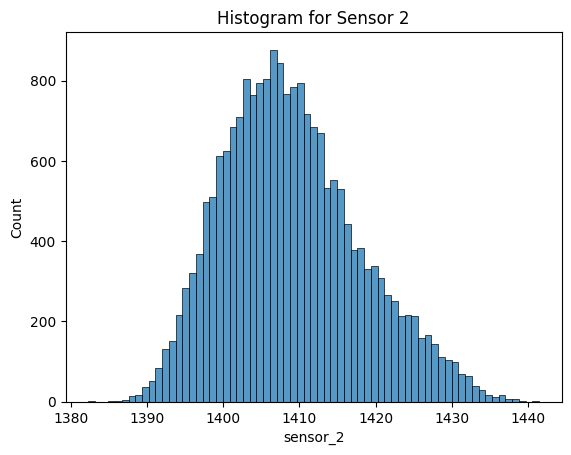

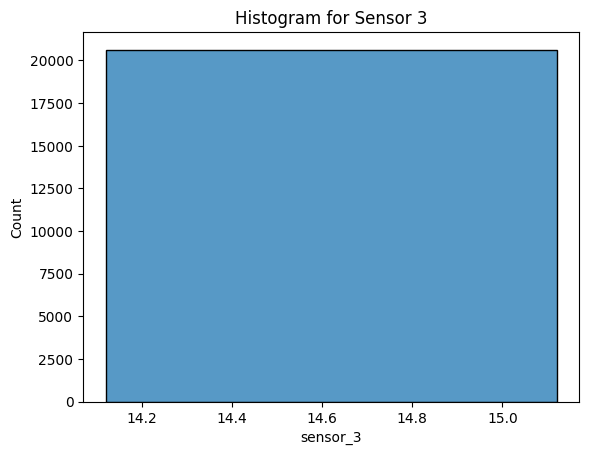

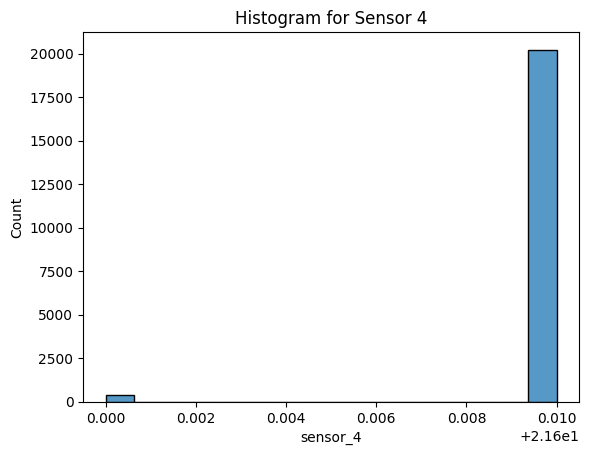

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Checking for missing values (blanks):")
print(df.isnull().sum())

print("\nShowing Sensor Histograms:")

sns.histplot(data=df, x='sensor_2')
plt.title('Histogram for Sensor 2')
plt.show()

sns.histplot(data=df, x='sensor_3')
plt.title('Histogram for Sensor 3')
plt.show()

sns.histplot(data=df, x='sensor_4')
plt.title('Histogram for Sensor 4')
plt.show()

#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [8]:
print("Adding new 'feature' columns...")

mean_lookup_table = df.groupby('engine_id')['sensor_2'].mean()
df['sensor_2_mean'] = df['engine_id'].map(mean_lookup_table)

std_lookup_table = df.groupby('engine_id')['sensor_2'].std()
df['sensor_2_std'] = df['engine_id'].map(std_lookup_table)

df['sensor_2_roll_mean_5'] = None

for engine_id in df['engine_id'].unique():
    
    engine_rows = df[df['engine_id'] == engine_id]
    
    rolling_values = engine_rows['sensor_2'].rolling(window=5, min_periods=1).mean()
    
    df.loc[engine_rows.index, 'sensor_2_roll_mean_5'] = rolling_values

print("\nData Head with new columns:")
print(df.head(10))

Adding new 'feature' columns...

Data Head with new columns:
      engine_id   cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
1 1     -0.0007 -0.0004         100.0        518.67        641.82   1589.70   
  2      0.0019 -0.0003         100.0        518.67        642.15   1591.82   
  3     -0.0043  0.0003         100.0        518.67        642.35   1587.99   
  4      0.0007  0.0000         100.0        518.67        642.35   1582.79   
  5     -0.0019 -0.0002         100.0        518.67        642.37   1582.85   
  6     -0.0043 -0.0001         100.0        518.67        642.10   1584.47   
  7      0.0010  0.0001         100.0        518.67        642.48   1592.32   
  8     -0.0034  0.0003         100.0        518.67        642.56   1582.96   
  9      0.0008  0.0001         100.0        518.67        642.12   1590.98   
  10    -0.0033  0.0001         100.0        518.67        641.71   1591.24   

      sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_15  sensor_

#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [10]:
from sklearn.preprocessing import StandardScaler

sensor_cols = []
for i in range(1, 22):
    sensor_cols.append('sensor_' + str(i))

scaler = StandardScaler()
scaled_sensors = scaler.fit_transform(df[sensor_cols])

df_scaled = df.copy()
df_scaled[sensor_cols] = scaled_sensors

print("Head of normalized (scaled) data:")
print(df_scaled.head())

print("\nCheck if scaling worked (mean should be ~0, std should be 1):")
print(df_scaled[sensor_cols].describe())

Head of normalized (scaled) data:
     engine_id   cycle  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
1 1    -0.0007 -0.0004         100.0        518.67        641.82 -0.134255   
  2     0.0019 -0.0003         100.0        518.67        642.15  0.211528   
  3    -0.0043  0.0003         100.0        518.67        642.35 -0.413166   
  4     0.0007  0.0000         100.0        518.67        642.35 -1.261314   
  5    -0.0019 -0.0002         100.0        518.67        642.37 -1.251528   

     sensor_2      sensor_3  sensor_4  sensor_5  ...  sensor_15  sensor_16  \
1 1 -0.925936 -1.776357e-15  0.141683  1.121141  ...  -0.781710        0.0   
  2 -0.643726 -1.776357e-15  0.141683  0.431930  ...  -0.781710        0.0   
  3 -0.525953 -1.776357e-15  0.141683  1.008155  ...  -2.073094        0.0   
  4 -0.784831 -1.776357e-15  0.141683  1.222827  ...  -0.781710        0.0   
  5 -0.301518 -1.776357e-15  0.141683  0.714393  ...  -0.136018        0.0   

     sensor_17  sensor_18  s

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.

In [12]:
import numpy as np

window_size = 30

sensor_cols = []
for i in range(1, 22):
    sensor_cols.append('sensor_' + str(i))

sequences = []

print("Building 3D sequence array...")
for engine_id in df_scaled['engine_id'].unique():
    
    engine_df = df_scaled[df_scaled['engine_id'] == engine_id]
    engine_sensors_table = engine_df[sensor_cols]
    engine_sensor_values = engine_sensors_table.values
    
    num_rows = len(engine_sensor_values)
    
    for i in range(num_rows - window_size + 1):
        chunk = engine_sensor_values[i : i + window_size]
        sequences.append(chunk)

seq_array = np.array(sequences)

print("Shape of the 3D sequence array:")
print(seq_array.shape)

print("\nFirst sequence (first 30-row chunk for Engine 1):")
print(seq_array[0])

Building 3D sequence array...
Shape of the 3D sequence array:
(17302, 30, 21)

First sequence (first 30-row chunk for Engine 1):
[[-1.34255176e-01 -9.25935964e-01 -1.77635684e-15  1.41683329e-01
   1.12114057e+00 -5.16338406e-01 -8.62813315e-01  0.00000000e+00
  -2.66466596e-01  3.34261840e-01 -1.05889024e+00 -2.69071040e-01
  -6.03815700e-01 -1.38777878e-17 -7.81709786e-01  0.00000000e+00
   0.00000000e+00  1.34849274e+00  1.19442705e+00             nan
              nan]
 [-3.29981781e-01 -1.04593081e+00 -1.77635684e-15  1.41683329e-01
   7.14393452e-01 -5.16338406e-01 -2.62333593e-01  0.00000000e+00
  -1.50204716e+00  4.69848531e-01 -6.41743693e-01 -8.09024627e-01
  -1.36106565e+00 -1.38777878e-17 -1.42740201e+00  0.00000000e+00
   0.00000000e+00  7.39890586e-01  2.35520102e-01             nan
              nan]
 [-7.54056093e-01  3.68452872e-01 -1.77635684e-15  1.41683329e-01
  -7.99609710e-01  4.69802670e-01 -1.00863117e+00  0.00000000e+00
  -3.03908431e-01  1.03764466e-01 -3.6364